**Table of Contents**

1) Prepare a classification model using SVM for salary data

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work
education	-- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation	 -- occupation of an individuals
relationship --
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week
native -- Native of an individual
Salary -- salary of an individual


**Importing Libraries**

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn.tree import DescionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
upload=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (1).csv


In [3]:
upload=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [79]:
data_train=pd.read_csv('SalaryData_Train(1).csv')
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [80]:
data_test=pd.read_csv('SalaryData_Test(1).csv')
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [81]:
data_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [82]:
data_train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [83]:
columns=['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for i in columns:
  print(i,"-",'\t')
  print(data_train[i].value_counts())

workclass - 	
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education - 	
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
maritalstatus - 	
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
occupation - 	
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992

**VISUALIZATIONS**

<Axes: xlabel='Salary', ylabel='count'>

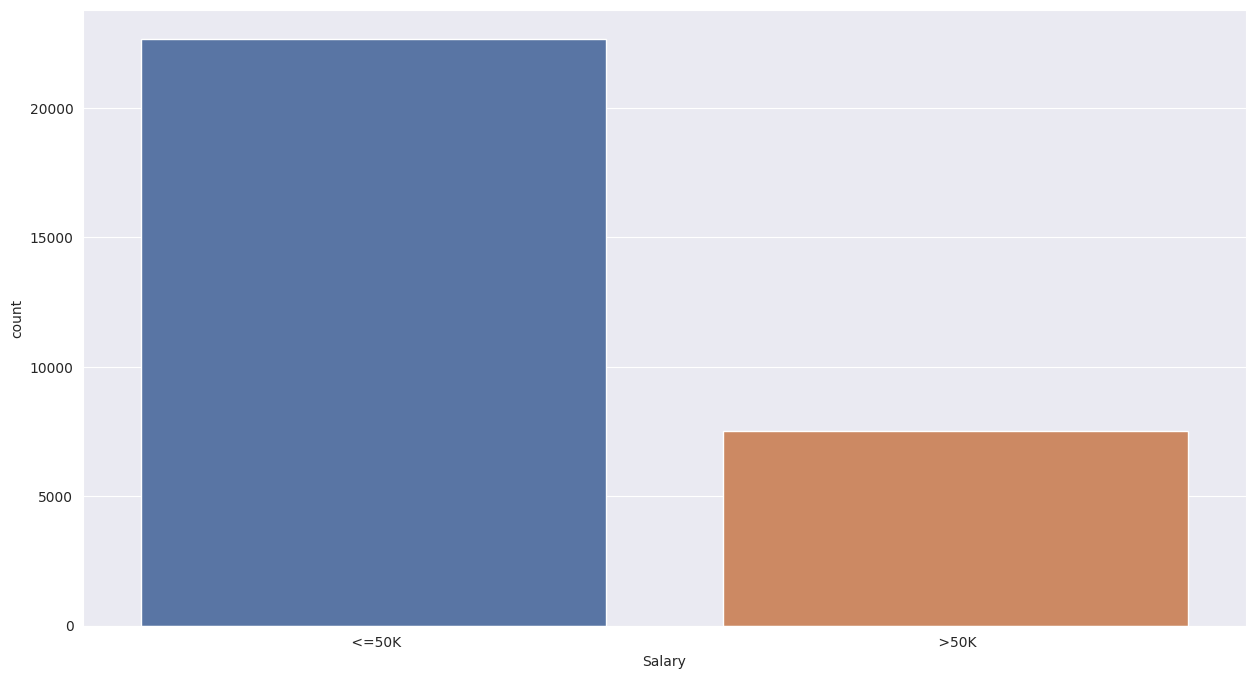

In [84]:
sns.countplot(x=data_train['Salary'])

In [85]:
le=LabelEncoder()
data_train['Salary']=le.fit_transform(data_train['Salary'])

workclass
Axes(0.125,0.11;0.775x0.77)
education
Axes(0.125,0.11;0.775x0.77)
maritalstatus
Axes(0.125,0.11;0.775x0.77)
occupation
Axes(0.125,0.11;0.775x0.77)
relationship
Axes(0.125,0.11;0.775x0.77)
race
Axes(0.125,0.11;0.775x0.77)
sex
Axes(0.125,0.11;0.775x0.77)
Salary
Axes(0.125,0.11;0.775x0.77)


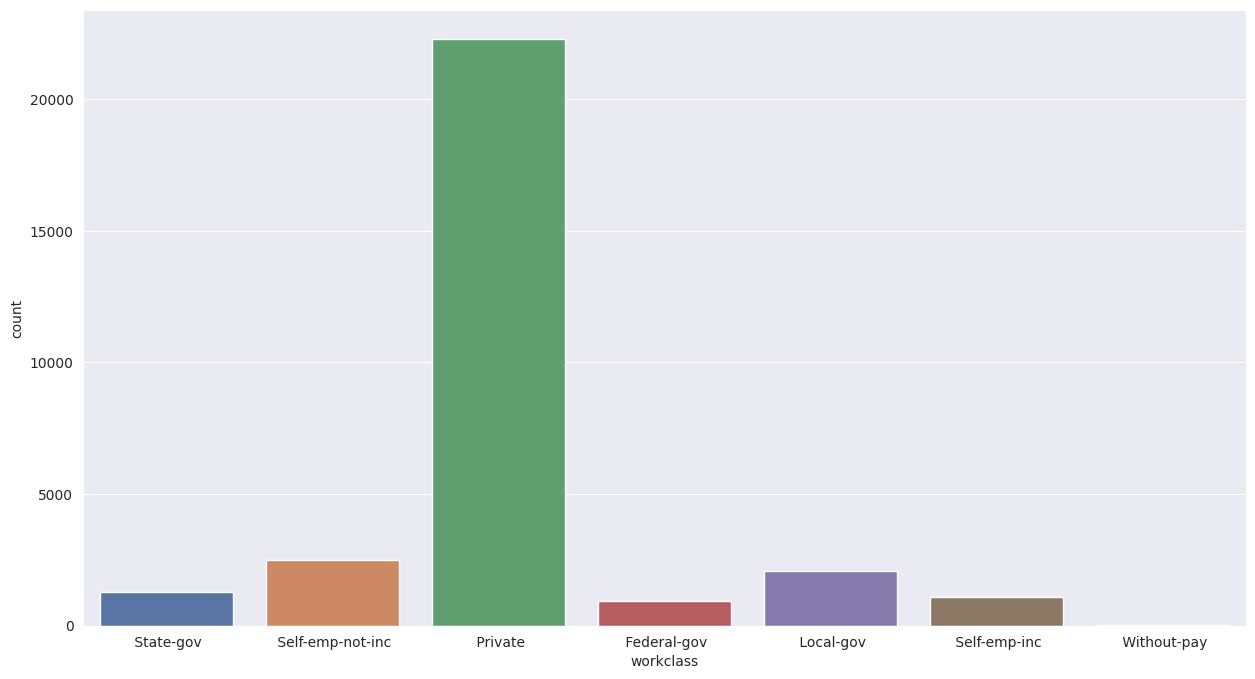

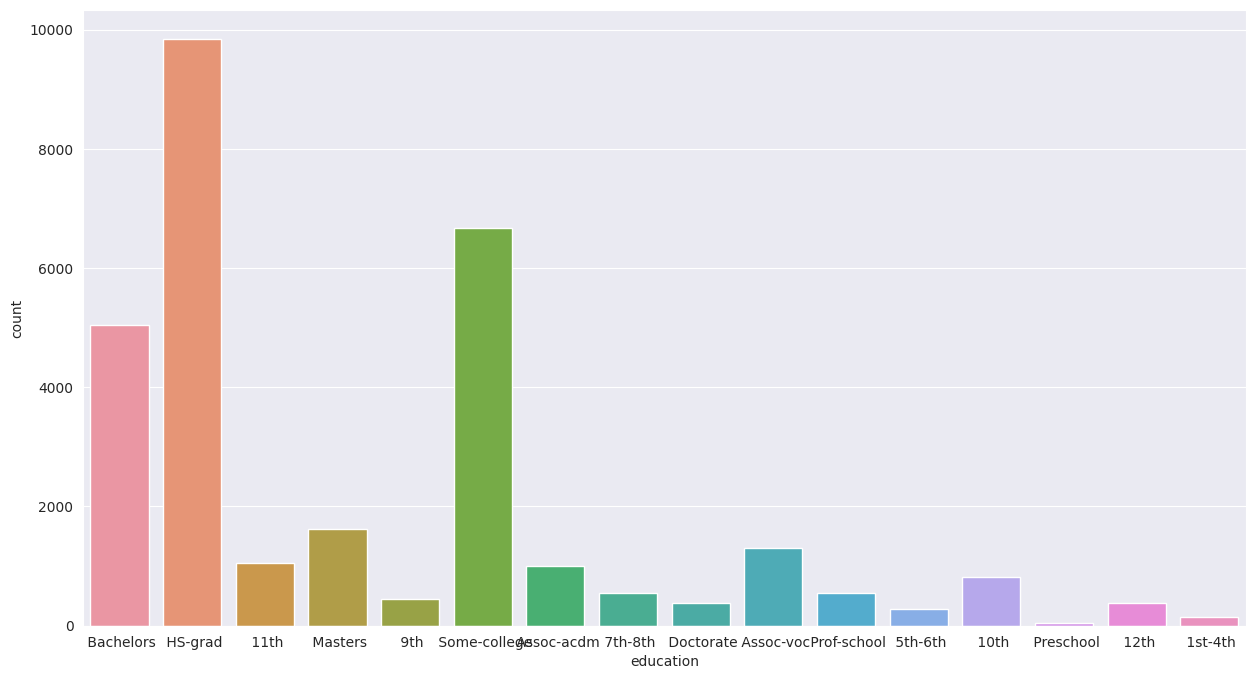

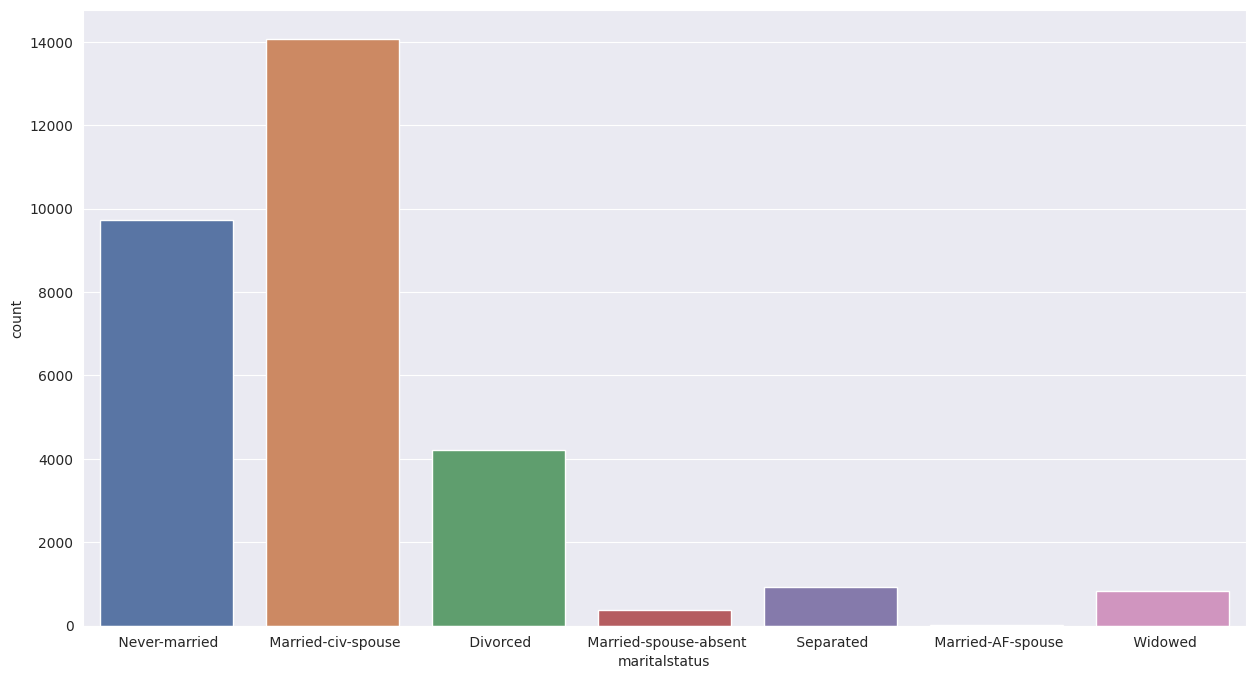

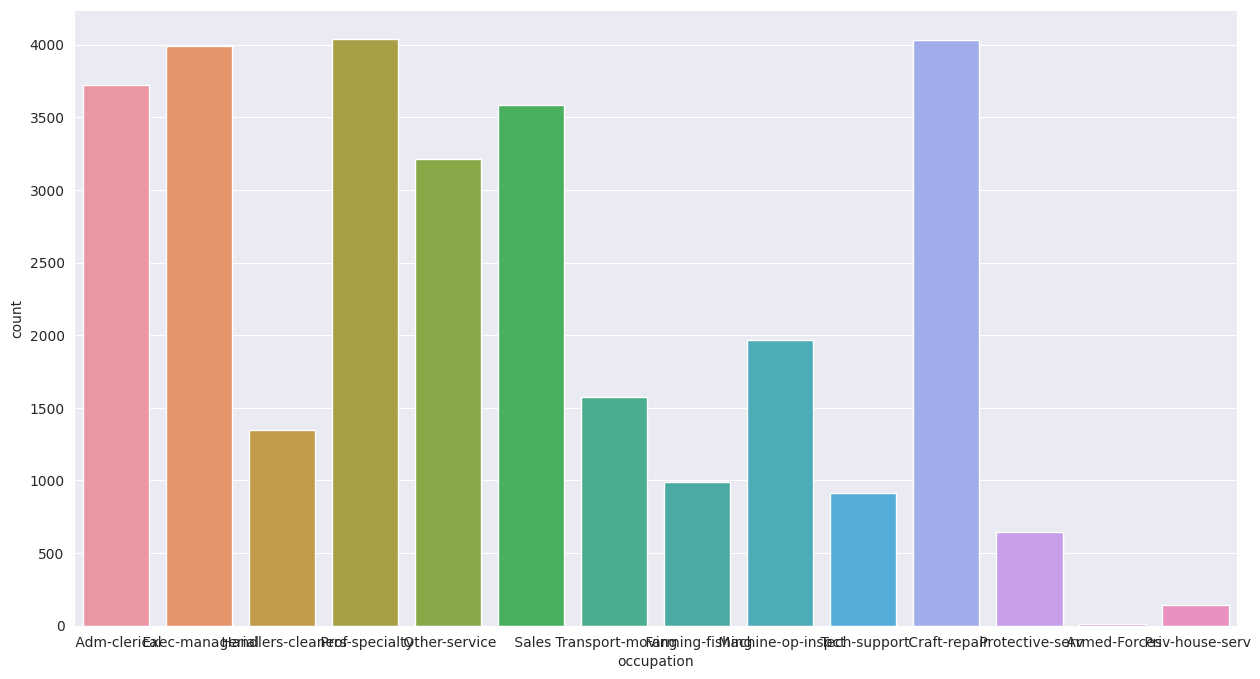

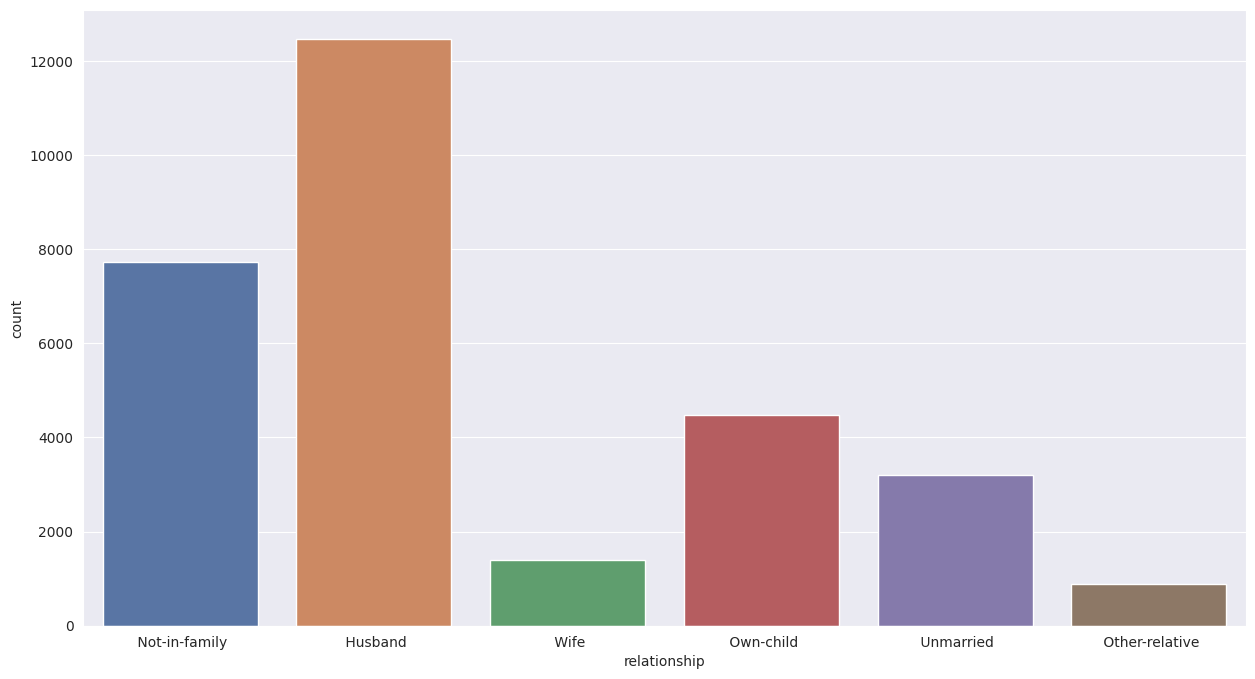

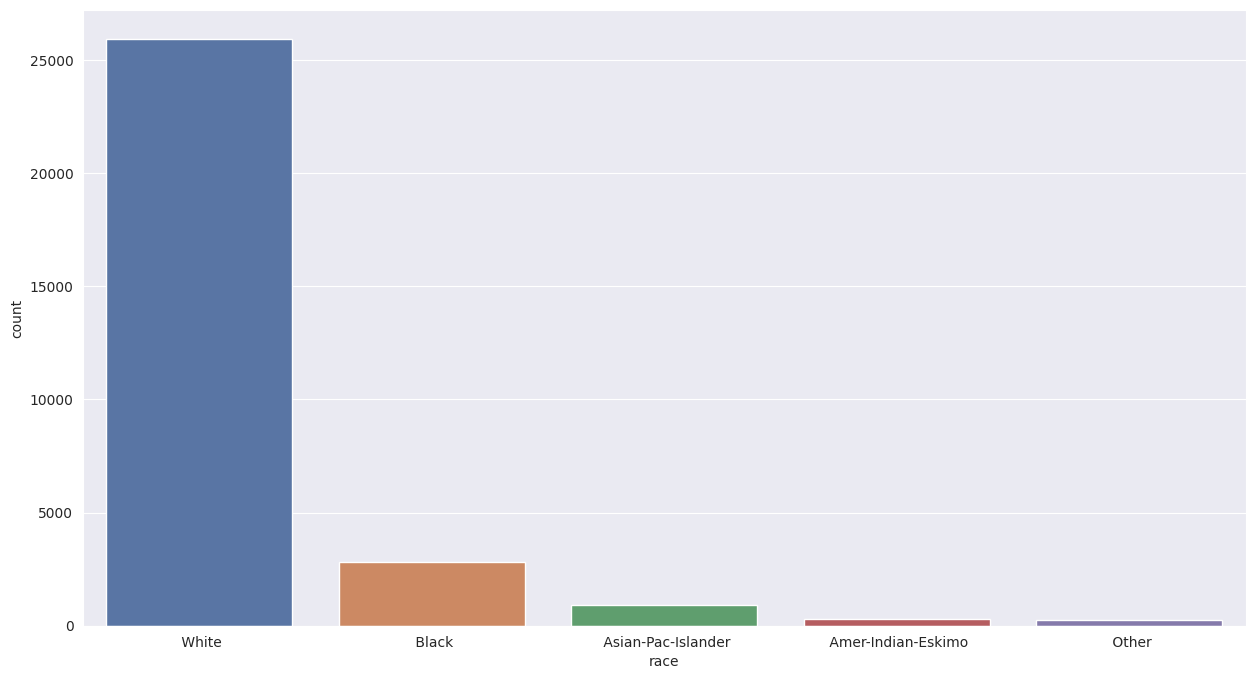

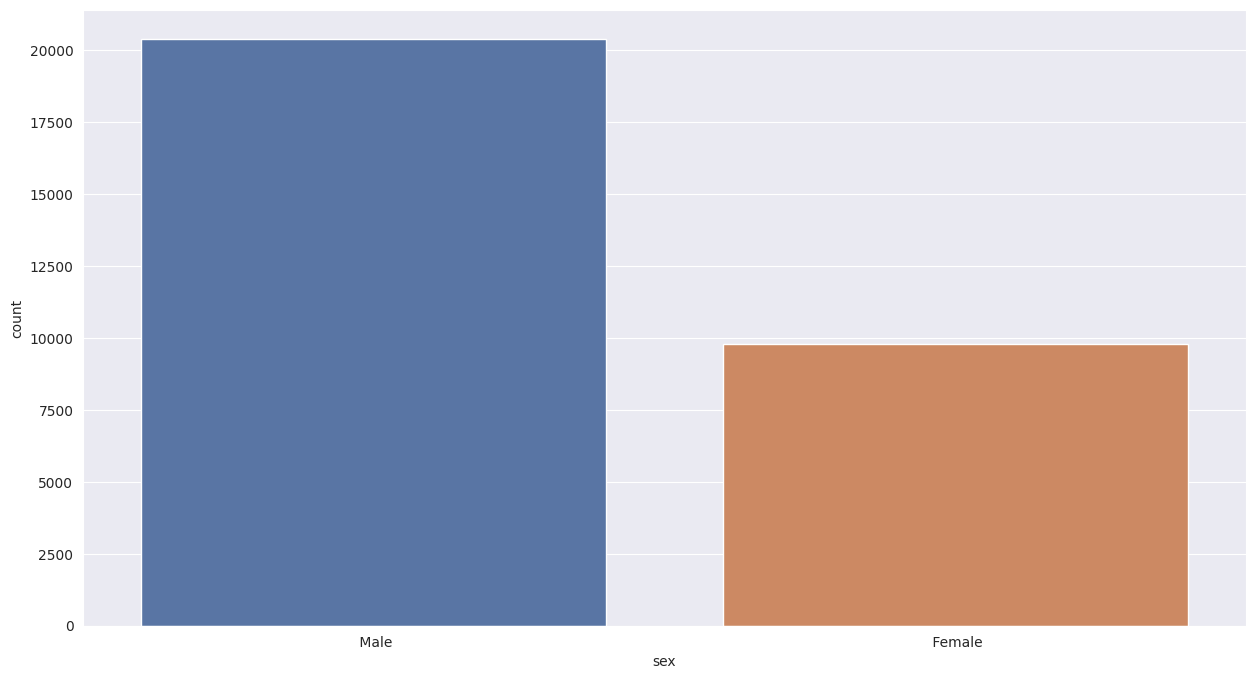

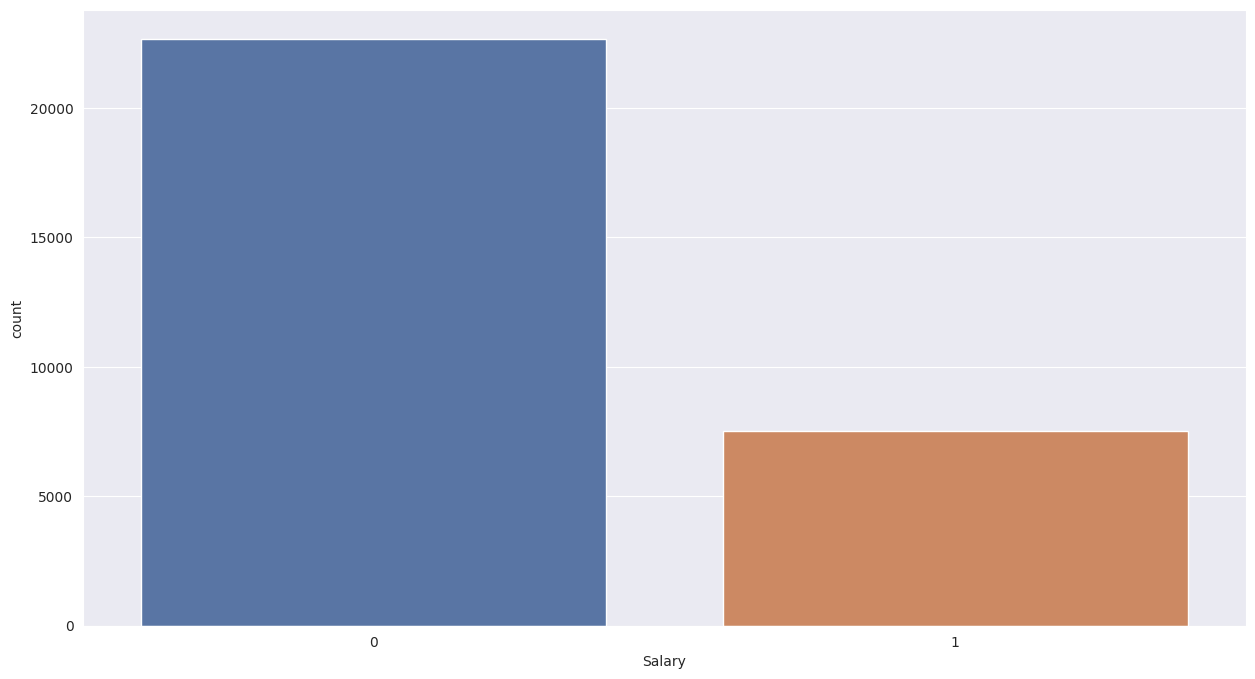

In [86]:
columns=['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
sns.set({'figure.figsize':(15,8)})
for i in columns:
  plt.figure()
  print(i)
  print(sns.countplot(x=i,data=data_train))

In [87]:
fig=px.pie(data_train,values='Salary',names='sex',hover_data=['Salary','sex'],labels={'Salary','sex'})
fig.show()

From this obsevation we can say that Men is doing more compared to Female with respect to job and also men

In [88]:
data_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [89]:
fig=px.histogram(data_train,x='occupation',y='Salary',text_auto=True,color='occupation')
fig.show()

With respect to Occupation exec-managerial is having the salary >=50K

In [90]:
fig=px.histogram(data_train,x='workclass',y='Salary')
fig.show()

<ipython-input-91-3bc8ed069cd9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='capitalgain', ylabel='Density'>

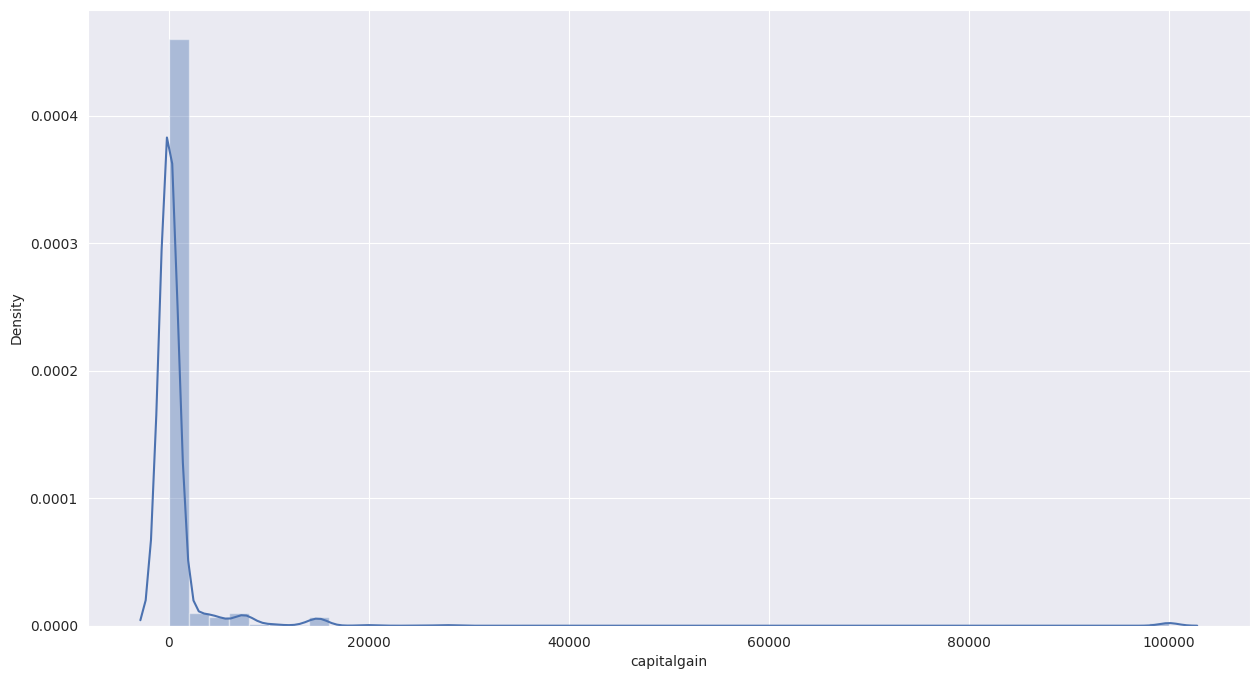

In [91]:
sns.distplot(data_train['capitalgain'])

<ipython-input-92-da0f5d4692c5>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='capitalloss', ylabel='Density'>

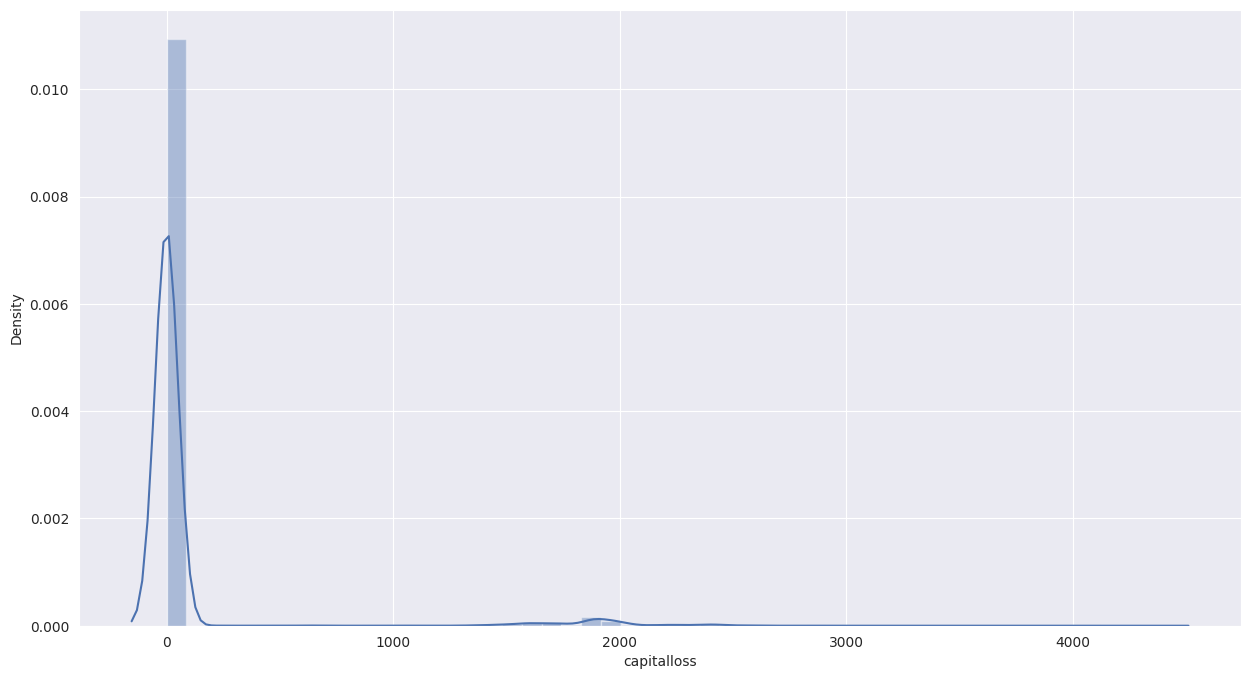

In [92]:
sns.distplot(data_train['capitalloss'])

**Private Sector is having the salary >=50K**

**FEATURE ENGINEERING**

In [93]:


columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']
for i in columns:
  data_train[i]=le.fit_transform(data_train[i])

data_train



,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,23,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,5,2,11,8,4,0,3,4,1,0,0,19,37,0


In [94]:
le=LabelEncoder()

columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native','Salary']
for i in columns:
  data_test[i]=le.fit_transform(data_test[i])

data_test


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


**Splitting data**

In [95]:
x_train1=data_train.iloc[:,:-1]
y_train1=data_train.iloc[:,-1]

In [96]:
x_test1=data_test.iloc[:,:-1]
y_test1=data_test.iloc[:,-1]

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=0.2)

**model building-linear**

In [98]:
model=SVC(kernel='linear',C=0.01,gamma=0.1)
model.fit(x_train1,y_train1)

SVC(C=0.01, gamma=0.1, kernel='linear')

In [99]:
y_pred_train=model.predict(x_train)


In [100]:
model.score(x_train,y_train)

0.8066976127320955

In [101]:
y_pred_test=model.predict(x_test)

In [102]:
accur_train=accuracy_score(y_test,y_pred_test)

In [103]:
print('Accuracy of train_dastaset :',accur_train)

Accuracy of train_dastaset : 0.7974473727830267


In [104]:
new_pred=model.predict(x_test1)


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,new_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.77      0.29      0.42      3700

    accuracy                           0.80     15060
   macro avg       0.79      0.63      0.65     15060
weighted avg       0.80      0.80      0.77     15060



In [31]:
accu_test=accuracy_score(y_test1,new_pred)


In [32]:
print('Accuracy of test_dastaset :',accu_test)

Accuracy of test_dastaset : 0.8037848605577689


**Here we can say that,model is working properly.Because the trained model is working properly for dataset by increase in accuracy of 0.001.So,that there may be less chances for 'Overfitting'**

**hyperparameter tuning**

In [72]:
model_rbf=SVC(kernel='rbf',C=0.01,gamma=0.1)
model_rbf.fit(x_train1,y_train1)

SVC(C=0.01, gamma=0.1)

**Traing model**

In [73]:
y_pred_trainrbf=model_rbf.predict(x_train)


**Testing Model**

In [75]:
y_pred_trainrbf=model_rbf.predict(x_test)

**Evaluating Model**

In [76]:
accuracy_score(y_test,y_pred_trainrbf)

0.7543160690571049

In [77]:
x_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1]

**Testing the test data with trained model**

In [106]:
new_preb_rbf=model_rbf.predict(x_test)

In [107]:
accuracy_score(y_test,new_preb_rbf)

0.746892093485828

**NavieBayes Models Tuning**

In [111]:
nb=MultinomialNB()
nb.fit(x_train1,y_train1)

MultinomialNB()

In [112]:
nb_pred_train=nb.predict(x_train)

In [113]:
nb_pred_test=nb.predict(x_test)

In [114]:
accu_trainmodel=accuracy_score(y_test,nb_pred_test)

In [115]:
accu_trainmodel

0.7717553455992043

In [116]:
new_pred_test=nb.predict(x_test1)

In [118]:
accu_testmodel=accuracy_score(y_test1,new_pred_test)

In [119]:
accu_testmodel

0.7800796812749003

In [144]:
x=['nb train model','nb test model']
y=[accu_trainmodel,accu_testmodel]
fig=px.bar(x=x,y=y,labels={'x':'accu_trainmodel','y':'accu_testmodel'},text_auto=True)
fig.show()

**GaussianNB tuning**

In [129]:
gnb=GaussianNB()
gnb.fit(x_train1,y_train1)

GaussianNB()

In [130]:
y_pred_train=gnb.predict(x_train)

In [131]:
y_pred_test=gnb.predict(x_test)

In [132]:
accu_traingnb=accuracy_score(y_test,y_pred_test)

In [133]:
accu_traingnb

0.8049063484170396

In [134]:
new_pred=gnb.predict(x_test1)

In [136]:
accu_traingnb=accuracy_score(y_test1,new_pred)

In [138]:
accu_testgnb

0.8146746347941567

In [143]:
x=['accu_traingnb','accu_testgnb']
y=[accu_traingnb,accu_testgnb]
fig=px.bar(x=x,y=y,labels={'x':'accu_traingnb','y':'accu_testgnb'},text_auto=True)


fig.update_layout(title='<b>Difference in accuracy </b>..',
                  title_font={'size':30,'family': 'Serif'},
                  paper_bgcolor='#D0D3D4',
                  plot_bgcolor='#D0D3D4')
fig.update_yaxes(showgrid=False)
fig.show()